In [1]:
#
# This notebook uses files generated in save.ipynb (so run that first)
#
import datatable as dt
import pandas as pd
import seaborn as sns
import os
import shutil
from time import time
from datatable import f
%matplotlib inline

In [2]:
df_time = dt.Frame([[]] * 3, names=["library", "file", "time"])

def append_row(df, row):
    df.rbind(dt.Frame([[j] for j in row]), bynames=False)

In [3]:
def measure(task):
    for lib in ['datatable', 'pandas']:
        try:
            inpfile = "%s_%s" % (task, lib)
            t0 = time()
            if lib == "datatable":
                df = dt.open(inpfile)
            else:
                df = pd.read_feather(inpfile)
            t1 = time()
            append_row(df_time, [lib, task, t1 - t0])
            print("[%-10s] %s = %f" % (lib, task, t1 - t0))
            del df
        except Exception as e:
            print("[%-10s] %s = Error: %s" % (lib, task, e))
            append_row(df_time, [lib, task, 0])

In [7]:
measure("airlines")
measure("higgs2M")
measure("donors")
measure("allstate")
measure("milsongs")

[datatable ] airlines = 0.004726
[pandas    ] airlines = 4.651850
[datatable ] higgs2M = 0.001244
[pandas    ] higgs2M = 0.461291
[datatable ] donors = 0.003081
[pandas    ] donors = 0.862012
[datatable ] allstate = 0.001713
[pandas    ] allstate = 7.824131
[datatable ] milsongs = 0.003903
[pandas    ] milsongs = 0.850307


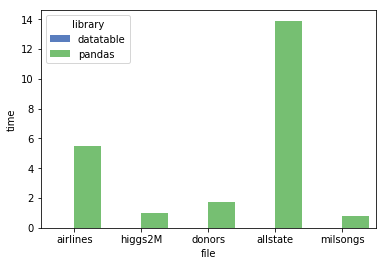

In [5]:
ax = sns.barplot(x="file", y="time", hue="library", palette="muted", data=df_time.topandas())

In [6]:
f0 = df_time[f.library=="datatable", {"file": f.file, "dt": f.time}]
f1 = df_time[f.library=="pandas", {"pd": f.time}]
f0.cbind(f1)
f0[:, {"file": f.file, "pd/dt": f.pd / f.dt}]

     file          pd/dt
---  --------  ---------
 0   airlines  2584.47  
 1   higgs2M    800.273 
 2   donors     566     
 3   allstate  8233.12  
 4   milsongs    77.0043

[5 rows x 2 columns]
